In [1]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nu
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

print(nu.filter_list('double', os.listdir(result_dir)))
targpath = os.path.join(result_dir, '20221116_mnist_double_0')
print(os.path.exists(targpath))

True
['20221031_double_mnist_two_0', '20221104_mnist_double_0', '20221103_mnist_double_0', '20221116_mnist_double_0', '20221101_mnist_double_0', '20221031_double_mnist_0', '20221101_mnist_double_two_0']
True


In [2]:
reload(nu)
targlist = os.listdir(targpath)

targlist = nu.model_exists(targlist,  targpath)

targlist = nu.filter_queries(query_list=['dim_a8', 'dim_m128'] , mylist=targlist)

print(targlist)




['pair_transitionTrue_dim_m128_dim_a8', 'pair_transitionFalse_dim_m128_dim_a8']


In [3]:
reload(sm)
#targdir_path = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221116_mnist_double_0/pair_transitionTrue_dim_m128_dim_a8' 
targdir_path = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221116_mnist_double_0/pair_transitionFalse_dim_m128_dim_a8' 


tp = 15
n_cond=2

Mlist = []
if os.path.exists(os.path.join(targdir_path, 'config.yml')):
    config = nu.load_config(targdir_path)
else:
    config = nu.load_config(baseline_path)

dataconfig = config['train_data']
dataconfig['args']['T'] = tp + n_cond
try:
    if dataconfig['name'] != 'SequentialMNIST_double':
        dataconfig['args']['train'] = False
except:
    print("Not working with the pair dataset")
dataconfig['args']['max_T'] = tp + n_cond


data = yu.load_component(dataconfig)

train_loader = DataLoader(data,
                          batch_size=config['batchsize'],
                          shuffle=True,
                          num_workers=config['num_workers'])
print(dataconfig)

model_config = config['model']
model = yu.load_component(model_config)
iterlist = nu.iter_list(targdir_path)

#[array([-4.44810926,  5.9317169 ]), array([-4.69249351,  6.69777453])] [array([-4.01038611, -6.21961682]), array([8.62280464, 3.90062484])]

/usr/local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


{'args': {'T': 17, 'backgrnd': False, 'max_T': 17, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': False, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': True, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}


/usr/local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [4]:
# maxiter = np.max(nu.iter_list(targdir_path))
# nu.load_model(model, targdir_path, maxiter)
# model = model.eval().to(device)

In [5]:
unko = data.__getitem__(0)

In [6]:
images = next(iter(train_loader))

In [7]:
if type(images) == list:
    images = torch.stack(images)
    images = images.transpose(1, 0)

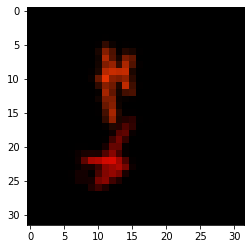

In [8]:
plt.imshow(images[4][0].permute([1,2,0]))

In [9]:
data.pairpos0, data.pairpos1

(array([[-4.44810926,  5.9317169 ],
        [-4.01038611, -6.21961682]]),
 array([[ 8.62280464,  3.90062484],
        [-4.69249351,  6.69777453]]))

In [13]:
1+1

2